In [2]:
import os
import sys
print(os.path.abspath("__file__"))
module_path = os.path.abspath(os.path.abspath("__file__")+"/../../../")
if module_path not in sys.path:
    sys.path.append(module_path)

print(module_path)

from test_result.model.Result import Results

path = os.path.abspath("__file__"+"/../../time_split_ddpg_multi_optimal")
print(path)

results: Results=Results.parse_file(path)
print(results.json())

/Users/szhao/Code/ML/dqn-rtb-tf2/test_result/visualization/__file__
/Users/szhao/Code/ML/dqn-rtb-tf2
/Users/szhao/Code/ML/dqn-rtb-tf2/test_result/time_split_ddpg_multi_optimal
[{"camp_id": "2997", "parameters": ["2997", "0.03125", "0.0001", "0.0001", "2500", "500", "96"], "epsilon": null, "total_budget": 19689072.0, "auctions": 156063.0, "optimal_reward": 147.34392004688485, "camp_result": {"imp": 21110.0, "click": 51.0, "cost": 265125.0, "wr": 0.13526588621261934, "ecpc": 5198.529411764706, "ecpi": 12.559213642823307}, "budget": [89351.60216299607, 85621.60216299607, 81261.60216299607, 78027.60216299607, 74939.60216299607, 70750.60216299607, 65815.60216299607, 62229.602162996074, 57694.602162996074, 52492.602162996074, 45753.602162996074, 39946.602162996074, 32395.602162996074, 22385.602162996074, 11659.602162996074, 2693.602162996074, 8.602162996074185, 8.602162996074185, 8.602162996074185, 8.602162996074185, 8.602162996074185, 8.602162996074185, 8.602162996074185, 8.602162996074185,

In [6]:
top = sorted(results.__root__, key=lambda result: result.camp_result.click)[::-1][0]

In [7]:
print(top)

camp_id='2997' parameters=['2997', '0.03125', '0.0001', '0.0001', '2500', '500', '96'] epsilon=None total_budget=19689072.0 auctions=156063.0 optimal_reward=147.72658419593765 camp_result=CampResult(imp=21539.0, click=52.0, cost=259130.0, wr=0.13801477608401755, ecpc=4983.2692307692305, ecpi=12.030734945912066) budget=[89385.60216299607, 85791.60216299607, 81588.60216299607, 78433.60216299607, 75685.60216299607, 71833.60216299607, 67267.60216299607, 63977.602162996074, 60224.602162996074, 55901.602162996074, 49788.602162996074, 44736.602162996074, 39310.602162996074, 31714.602162996074, 22746.602162996074, 15870.602162996074, 6909.602162996074, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.602162996074185, 30.6021

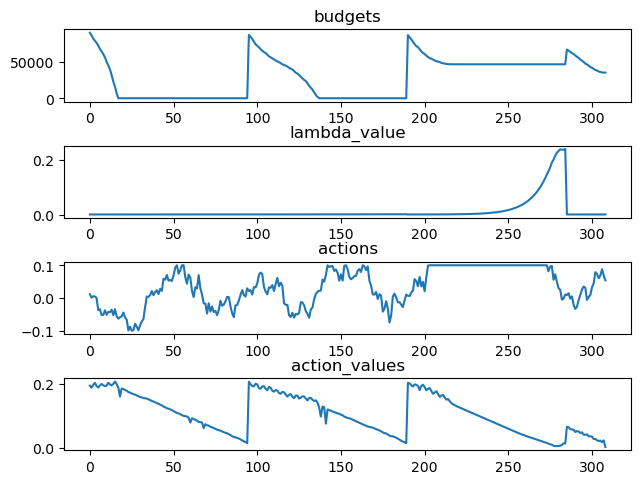

<Figure size 640x480 with 0 Axes>

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import pandas as pd
import numpy as np

df = pd.DataFrame({
    'budgets': top.budget,
    'lambda_value': top.lambda_value,
})

if top.actions:
    df['actions'] = top.actions
if top.unimod:
    df['unimod'] = top.unimod
if top.action_values:
    df['action_values'] = top.action_values
if top.action_nested_values:
    df['action_nested_values']: top.action_nested_values

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1)
fig.tight_layout()
figure(figsize=(8, 6), dpi=80)

df['budgets'].plot(ax=axes[0]); axes[0].set_title('budgets')
df['lambda_value'].plot(ax=axes[1]); axes[1].set_title('lambda_value')
row = 1
optional_graphs = ['actions', 'unimod', 'action_values', 'action_nested_values']
for column in optional_graphs:
    if column in df:
        row += 1
        ax = axes[row]
        df[column].plot(ax=ax); ax.set_title(column)

